# [CoE202] **[Homework1a]** nD Linear fitting with gradient descent

In this section, you are going to implement linear regression algorithms.

### 0. Importing packages

For this assignment we need Numpy and Matplotlib.

In [14]:
# Importing packages required for the homework
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)

### 1. Linear regression extension

For extension, we will consider cases when x is not single dimension but multi dimesional vector. 

In [15]:
# data points
X = np.array([[0.0, 1.0], [1.0, 1.0], [2.0, 2.0], [3.0, 1.0],  [4.0, 1.0],  [5.0, 3.0]]) 
y = np.array([0.0, 1.1, 0.9, 3.1, 3.8, 3.1])

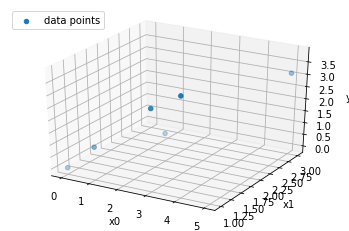

In [16]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()

In [17]:
def linear_features(x, K):
    """ Computes the feature matrix Phi

    Arguments:
      x: input data of size N x K
      K: dimension of input data x
    
    Returns:
      X_aug: feature matrix of size N x (K + 1)
    """
    X = x.reshape(-1, K)  # 6 x K vector, N=6, D=K
    N, _ = X.shape
    X_aug = np.hstack([np.ones((N, 1)), X])  # augmented X of size 6 x (K+1)
    return X_aug

def vectorize_y(y):
    y_vec = y.reshape(-1, 1)  # 6 x 1 vector, N=6
    return y_vec

In [18]:
# convert our data into matrix form
X_aug = linear_features(X, 2)
y_vec = vectorize_y(y)

print(X_aug)
print(y_vec)

[[1. 0. 1.]
 [1. 1. 1.]
 [1. 2. 2.]
 [1. 3. 1.]
 [1. 4. 1.]
 [1. 5. 3.]]
[[0. ]
 [1.1]
 [0.9]
 [3.1]
 [3.8]
 [3.1]]


### 2. Linear regression using gradient-based optimization algorithms.

We will implement 3 different gradient-based optimization algorithms here.
1. np_linearfit_gd: Vanilla gradient decent
2. np_linearfit_sgd: Stochastic gradient descent 
3. np_linearfit_sgd_momentum: Stochastic gradient descent with momentum

In [19]:
def np_linearfit(X_aug, y):
    """Compute the coefficients by closed form linear fitting.

    Arguments:
      X_aug: feature matrix of size N x (K + 1)
      y: training targets of size N x 1
    
    Returns:
      theta: coefficients of the linear function.
    """
    theta = (np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T) @ y  # matrix multiplication is also used as "@"

    return theta

In [20]:
def np_linearfit_gd(X_aug, y_vec):
    """Linear fitting using gradient descent.

    Arguments:
      X_aug: feature matrix of size N x (K + 1)
      y_vec: training targets of size N x 1
    
    Returns:
      theta: coefficients of the linear function.
    """
    alpha = 0.01              # learning rate
    num_iter = 10000          # number of iterations
    theta = np.zeros((3, 1))  # initialize theta
    N, _ = X_aug.shape        # the number of input data

    # iteratively apply gradient descent
    for i in range(num_iter):
        # [Problem 1] calculate gradient, grad_L from X_aug, theta and y_vec
        # calculate gradients
        
        # Fill out here        
        grad_L = (2/N) * X_aug.T @ (X_aug @ theta - y_vec)

        # [Problem 2] Update theta using alpha and grad_L
        # update theta
        
        # FIll out here        
        theta = theta - alpha*grad_L
  
    return theta    

In [21]:
def np_linearfit_sgd(X_aug, y_vec):
    """Linear fitting using stochastic gradient descent (SGD).

    Arguments:
      X_aug: feature matrix of size N x (K + 1)
      y_vec: training targets of size N x 1
    
    Returns:
      theta: coefficients of the linear function.
    """
    alpha = 0.01              # learning rate
    num_iter = 10000          # number of iterations
    theta = np.zeros((3, 1))  # initialize theta
    N, _ = X_aug.shape        # the number of input data

    # iteratively apply gradient descent
    for i in range(num_iter):
        # [Problem 3] Shuffle the data order
        # hint: numpy.random.permutation
        # fil out here
        Xy = np.hstack([X_aug, y_vec]) #(x,y) pair를 맞춰주기 위해
        Xy = np.random.permutation(Xy) # 그리고 랜덤
        X_ran = Xy[:,0:3] # 0~2열은 x
        y_ran = Xy[:,3] #3열은 y
        y_ran = y_ran.reshape(-1,1) #size N x 1로 맞춰주기 위해

        for j in range(3): # split 6 data points into 3 mini-batches (2 datapoints per mini-batch)
          # [Problem 4] calculate gradient, grad_L from X_aug, theta and y_vec from the mini-batch
          # calculate gradients
          
          # Fill out here
          X_bat = X_ran[2*j:2*(j+1),:]
          y_bat = y_ran[2*j:2*(j+1)]
          
          grad_L = 1* X_bat.T @ (X_bat @ theta - y_bat)#앞에 2/N,N은 데이터 개수인데 2개라서 1

          # [Problem 5] Update theta using alpha and grad_L using the gradient from the mini-batch
          # update theta
          
          # FIll out here        
          theta = theta - alpha*grad_L
  

    return theta   

In [22]:
def np_linearfit_sgd_momentum(X_aug, y_vec):
    """Linear fitting using stochastic gradient descent with momentum.

    Arguments:
      X_aug: feature matrix of size N x (K + 1)
      y_vec: training targets of size N x 1
    
    Returns:
      theta: coefficients of the linear function.
    """
    alpha = 0.01              # learning rate
    momentum = 0.9            # momentum
    num_iter = 10000          # number of iterations
    theta = np.zeros((3, 1))  # initialize theta
    N, _ = X_aug.shape        # the number of data

    # iteratively apply gradient descent
    grad_L = 0  # initialize grad_L to 
    del_theta=np.zeros((3,1)) #del_theta도 초기화
    for i in range(num_iter):
        # [Problem 6] Shuffle the data order
        # hint: numpy.random.permutation
        # fil out here
        Xy = np.hstack([X_aug, y_vec]) #(x,y) pair를 맞춰주기 위해
        Xy = np.random.permutation(Xy) # 그리고 랜덤
        X_ran = Xy[:,0:3] # 0~2열은 x
        y_ran = Xy[:,3] #3열은 y
        y_ran = y_ran.reshape(-1,1) #size N x 1로 맞춰주기 위해


        for j in range(3): # split 6 data points into 3 mini-batches (2 datapoints per mini-batch)
          # [Problem 7] calculate gradient, grad_L from X_aug, theta and y_vec from the mini-batch
          # calculate gradients
          
          # Fill out here
          X_bat = X_ran[2*j:2*(j+1),:]
          y_bat = y_ran[2*j:2*(j+1)]

          grad_L = 1* X_bat.T @ (X_bat @ theta - y_bat)
          # [Problem 8] Update theta using alpha and grad_L using the gradient from the mini-batch (with momentum)
          # update theta
          
          # FIll out here     
          del_theta = momentum*del_theta - alpha*grad_L
          theta = theta + del_theta
  
    return theta           

### 3. Testing algorithms.

#### 3-0. Let's try running closed form solution (np_linearfit).

[[ 0.96829268]
 [ 0.9804878 ]
 [-0.94634146]]


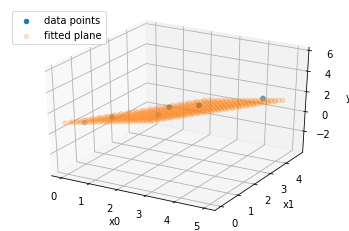

In [23]:
# get coefficients 
theta_ml = np_linearfit(X_aug, y_vec)
print(theta_ml)

# plot results
xp0 = np.linspace(0, 5, 100) 
xp1 = np.linspace(0, 5, 100)
Xtest = np.mgrid[0:5:0.25, 0:5:0.25].reshape(2,-1).T  # 10000 x 2 vector for test inputs
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

prediction = Xtest_aug @ theta_ml

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.scatter(Xtest[:, 0], Xtest[:, 1], prediction, label = 'fitted plane', alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()

#### 3-1. Let's try runing gradient descent (np_linearfit_gd).

[[ 0.96829268]
 [ 0.9804878 ]
 [-0.94634146]]


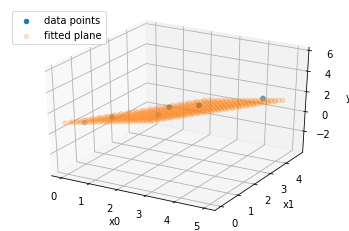

In [24]:
# get coefficients 
theta_ml = np_linearfit_gd(X_aug, y_vec)
print(theta_ml)

# plot results
xp0 = np.linspace(0, 5, 100) 
xp1 = np.linspace(0, 5, 100)
Xtest = np.mgrid[0:5:0.25, 0:5:0.25].reshape(2,-1).T  # 10000 x 2 vector for test inputs
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

prediction = Xtest_aug @ theta_ml

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.scatter(Xtest[:, 0], Xtest[:, 1], prediction, label = 'fitted plane', alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()

#### 3-2. Let's try runing SGD (np_linearfit_sgd).

[[ 0.96214491]
 [ 0.97664533]
 [-0.9443446 ]]


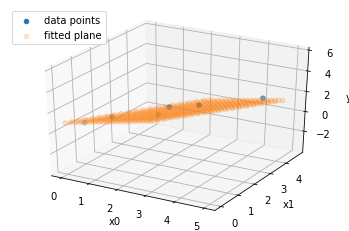

In [25]:
# get coefficients 
theta_ml = np_linearfit_sgd(X_aug, y_vec)
print(theta_ml)

# plot results
xp0 = np.linspace(0, 5, 100) 
xp1 = np.linspace(0, 5, 100)
Xtest = np.mgrid[0:5:0.25, 0:5:0.25].reshape(2,-1).T  # 10000 x 2 vector for test inputs
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

prediction = Xtest_aug @ theta_ml

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.scatter(Xtest[:, 0], Xtest[:, 1], prediction, label = 'fitted plane', alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()

#### 3-3. Let's try runing SGD with momentum (np_linearfit_sgd_momentum).

[[ 0.96228578]
 [ 0.99179745]
 [-0.93258355]]


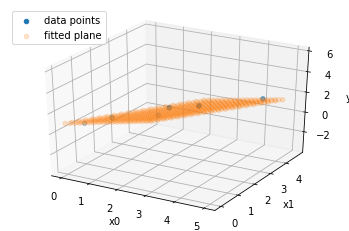

In [26]:
# get coefficients 
theta_ml = np_linearfit_sgd_momentum(X_aug, y_vec)
print(theta_ml)

# plot results
xp0 = np.linspace(0, 5, 100) 
xp1 = np.linspace(0, 5, 100)
Xtest = np.mgrid[0:5:0.25, 0:5:0.25].reshape(2,-1).T  # 10000 x 2 vector for test inputs
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

prediction = Xtest_aug @ theta_ml

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.scatter(Xtest[:, 0], Xtest[:, 1], prediction, label = 'fitted plane', alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()